In [72]:
%matplotlib inline

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import json
import pprint
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [74]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [75]:
targetDir = "../data/output/d2/Result/"
speedDir = "../data/output/d2/Speed/"
brakeDir = "../data/output/d2/Brake/"
accelDIr = "../data/output/d2/Accel/"
steeringPositiveDir = "../data/output/d2/SteeringPositive/"
steeringNegativeDir = "../data/output/d2/SteeringNegative/"

In [76]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [77]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")
gridSize = len(df)

In [78]:
# noisyRows = [1568, 626, 1252, 662, 625, 1332, 624, 623, 663, 662, 711, 751]
# df = df.drop(df.index[noisyRows])

In [79]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]
rmf.columns = ["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive",  "steeringNegative"]

In [80]:
rmf.describe()

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,24.925926,143.671958,70.931217,125.698413,41.079365,60.656085,44.248677,70.333333
std,42.683332,112.518643,123.103617,326.987945,57.966783,73.242771,101.678763,200.804923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,43.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
50%,4.000000,135.000000,6.000000,1.000000,17.000000,24.000000,1.000000,2.000000
75%,27.000000,216.000000,97.000000,30.000000,55.000000,94.000000,22.000000,23.000000
max,188.000000,536.000000,701.000000,2012.000000,313.000000,383.000000,521.000000,1455.000000


In [81]:
colors = [
    "#ff0000",
    "#ffa500",
    "#ffff00",
    "#008000",
    "#00ffff",
    "#0000ff",
    "#800080"
]

In [82]:
colors13 = [
    "#f39700",
    "#e60012",
    "#9caeb7",
    "#00a7db",
    "#009944",
    "#d7c447",
    "#967cb6",
    "#00ada9",
    "#bb641d",
    "#e85298",
    "#0079c2",
    "#6cbb5a",
    "#b6007a"
]

# VBGMM

In [83]:
bf = rmf.copy()
bf["sum"] = bf["red"] + bf["yellow"] + bf["green"] + bf["slow"] + bf["brake"] + bf["accel"] + bf["steeringPositive"] + bf["steeringNegative"]

for key in rmf.columns:
    if key == "sum":
        continue
    bf[key] = bf[key] / bf["sum"]

bf = bf[["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]

In [95]:
components = 7
prior = 0.1

In [96]:
def gridSearch():
    result = []
    for k in range(20):
        sd = k
        np.random.seed(sd)
        random.seed(sd)
    
        vb = BayesianGaussianMixture(n_components=components, weight_concentration_prior=prior, max_iter=200).fit(bf)
        result.append({
                "seed": sd,
                "classes": len(set(vb.predict(bf))),
                "lower bounds": vb.lower_bound_
        })

    return sorted(result, key=lambda res: res["lower bounds"])

pprint.pprint(gridSearch())

[{'classes': 7, 'lower bounds': 5131.4088975400718, 'seed': 19},
 {'classes': 7, 'lower bounds': 5133.241763454861, 'seed': 13},
 {'classes': 7, 'lower bounds': 5134.979133801703, 'seed': 16},
 {'classes': 7, 'lower bounds': 5135.2956704532489, 'seed': 6},
 {'classes': 7, 'lower bounds': 5138.5013409960147, 'seed': 2},
 {'classes': 7, 'lower bounds': 5145.4402548600865, 'seed': 18},
 {'classes': 7, 'lower bounds': 5147.1744101980803, 'seed': 14},
 {'classes': 7, 'lower bounds': 5147.655213284861, 'seed': 10},
 {'classes': 7, 'lower bounds': 5156.5232789644569, 'seed': 15},
 {'classes': 7, 'lower bounds': 5161.3991907407153, 'seed': 9},
 {'classes': 7, 'lower bounds': 5161.7115778008101, 'seed': 5},
 {'classes': 7, 'lower bounds': 5162.2207119519908, 'seed': 7},
 {'classes': 7, 'lower bounds': 5162.2666757732877, 'seed': 8},
 {'classes': 7, 'lower bounds': 5163.4251143010288, 'seed': 1},
 {'classes': 7, 'lower bounds': 5164.2559799914225, 'seed': 17},
 {'classes': 7, 'lower bounds': 516

In [86]:
sd = 8
np.random.seed(sd)
random.seed(sd)

In [87]:
vb = BayesianGaussianMixture(n_components=components, weight_concentration_prior=prior, max_iter=200).fit(bf)
print "classes:          ", set(vb.predict(bf))
print "lower bound: ", vb.lower_bound_

classes:           set([0, 1, 2, 3, 4, 5])
lower bound:  4966.6855103


In [88]:
vb.weights_

array([ 0.2116818 ,  0.22981094,  0.21548652,  0.18467854,  0.13433476,
        0.02400745])

In [89]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
0,0.005166,0.140276,0.169573,0.341205,0.069874,0.100642,0.026304,0.146960
1,0.129450,0.573503,0.028627,0.009560,0.122241,0.116356,0.012714,0.007549
2,0.007025,0.314238,0.204900,0.091549,0.094658,0.152204,0.099217,0.036209
3,0.435154,0.453738,0.003596,0.003413,0.008061,0.062263,0.002513,0.031262
4,0.041738,0.459102,0.012583,0.006638,0.032761,0.115686,0.169150,0.162342
5,0.020521,0.878226,0.033480,0.016141,0.011812,0.018659,0.009288,0.011872


# Plot histgram of each clusters

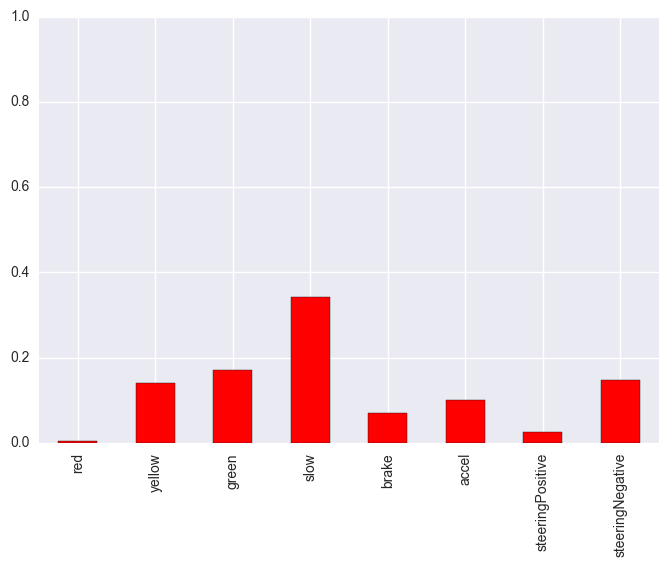

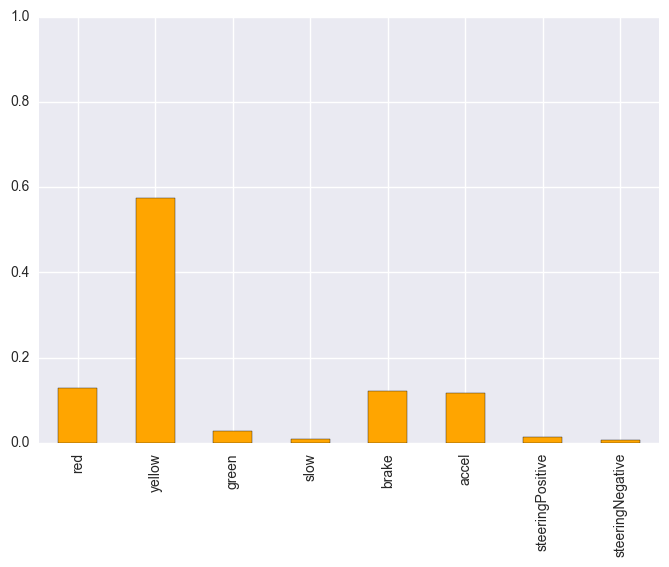

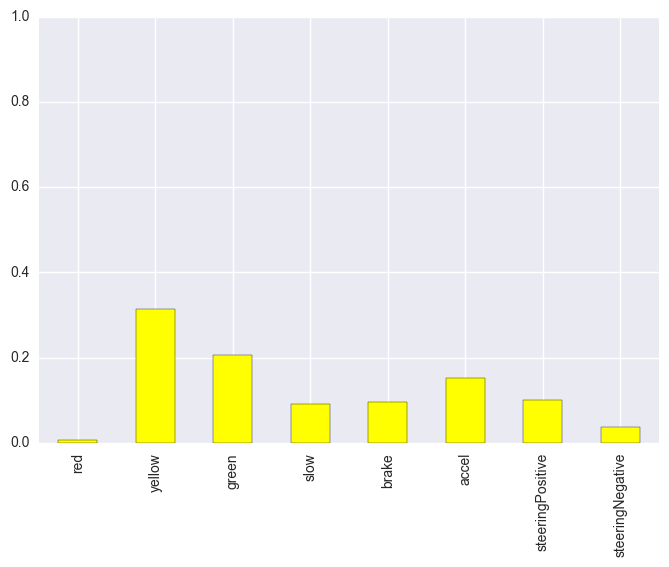

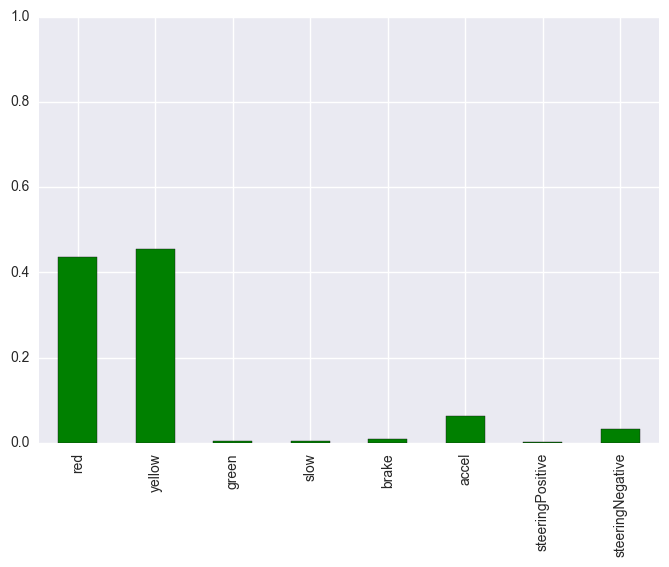

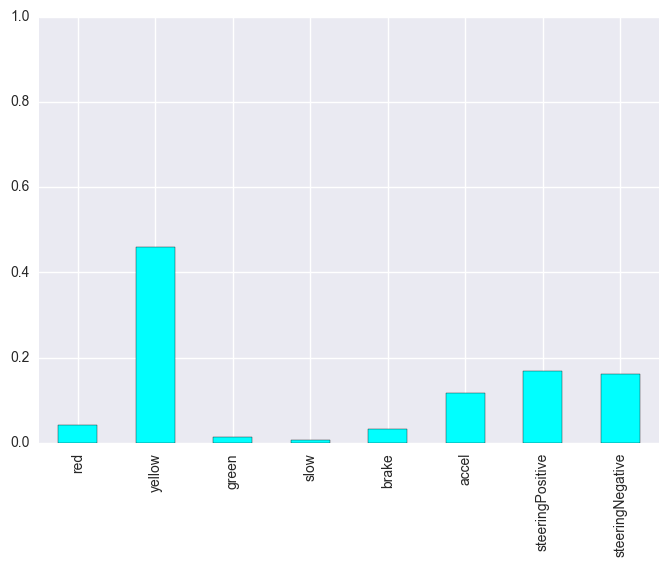

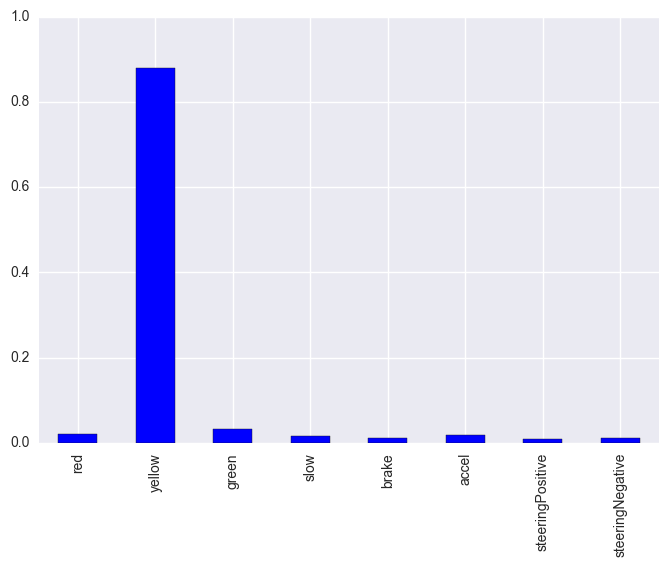

In [90]:
dir = "./img/d2/clusters-" + str(sd)
if not os.path.exists(dir):
    os.mkdir(dir)
    
resLength = len(set(vb.predict(bf)))
for i in range(resLength):
    ref.ix[i].plot(kind='bar', color=colors[i])
    plt.ylim(0, 1)
    plt.savefig(dir + "/cluster" + str(i) + ".png")
    plt.show()

# Save

In [91]:
pred = zip(rmf.index, vb.predict(bf))
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters.csv", result, delimiter=",", fmt="%d")

with open(dir + '/VBSetting.json', 'w') as outfile:
    data = {
        "n_components": components,
        "weight_concentration_prior": prior,
        "seed": sd
    }
    json.dump(data, outfile)

# Plot histgram for high risk top 5 

In [92]:
top5Index = [1337, 632, 1289, 182, 869]

In [93]:
top5Color = vb.predict(bf.ix[top5Index])

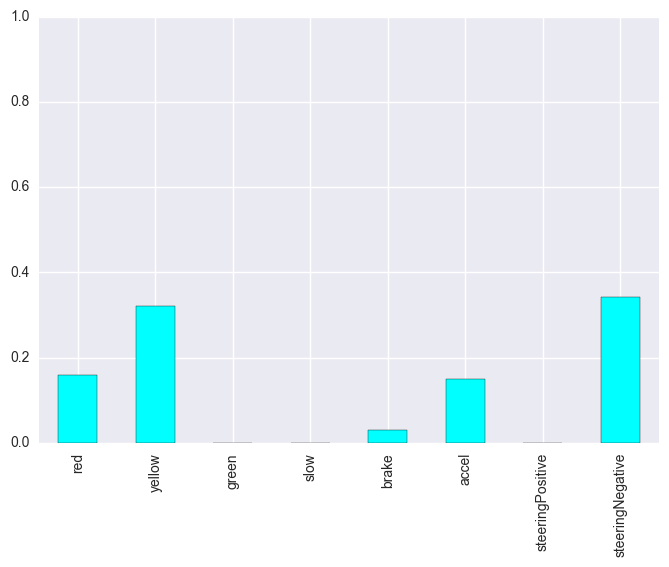

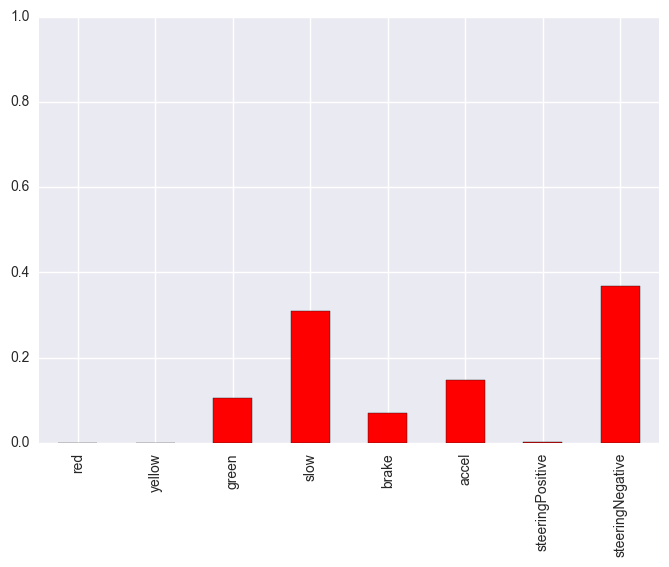

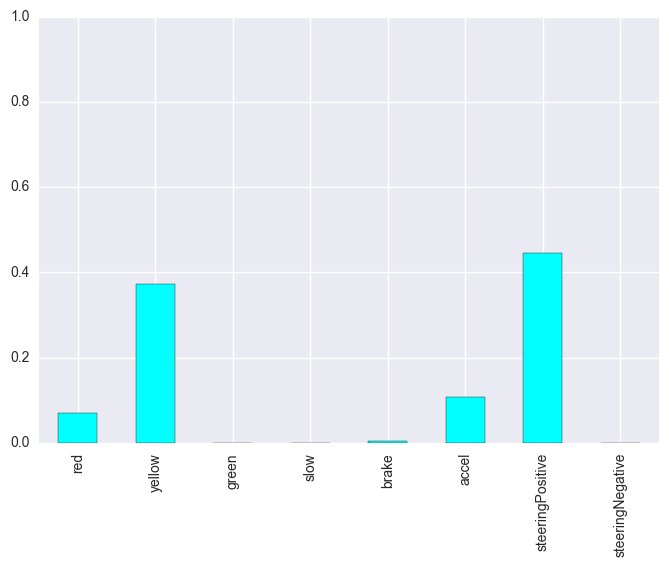

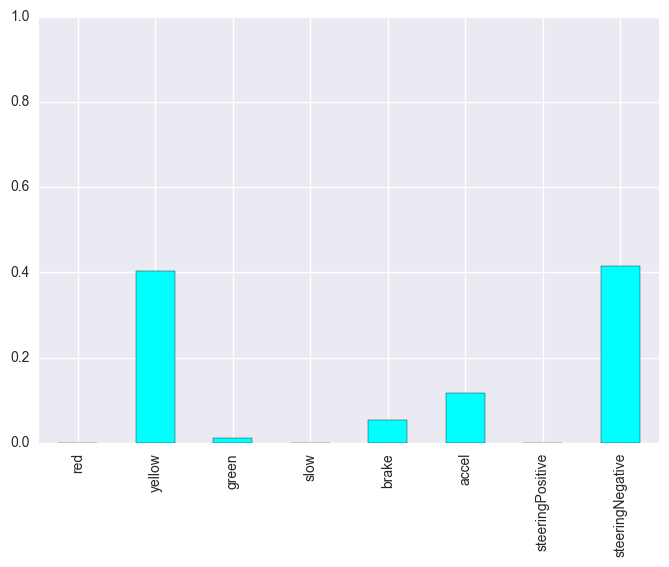

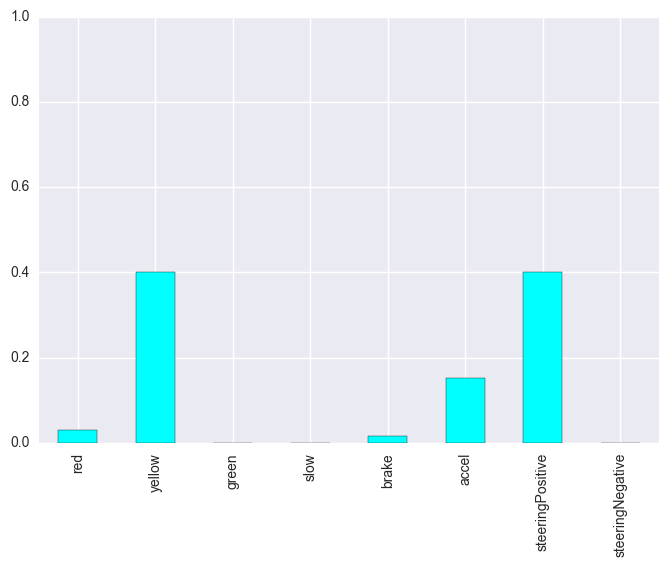

In [94]:
for i, ic in enumerate(zip(top5Index, top5Color)):
    bf.ix[ic[0]].plot(kind='bar', color=colors[ic[1]])
    plt.ylim(0, 1)
    plt.savefig(dir + "/top5-" + str(i+1) + ".png")
    plt.show()

# Remove Noisy
## cluster 7
### seed 5 ◎
+ 中速直進
+ 低速右左折
+ 高速
+ 中速左折
+ 中速右折
+ 中速&加速=>高速
+ 低速右折

### seed 8 ○
+ 中速&減速
+ 低速
+ 中低速加速
+ 高速直進
+ 中速加速
+ 低速右折
+ 中速右左折

### seed 14 ☓
+ 中低速加速
+ 中速加速
+ 中速減速
+ 高速直進
+ 中速右左折
+　低速直進
+ 低速右折

{'classes': 7, 'lower bounds': 4973.4571129221058, 'seed': 5},  
{'classes': 7, 'lower bounds': 4974.5339535203484, 'seed': 14},   
{'classes': 7, 'lower bounds': 4977.2361323758323, 'seed': 8},

## cluster 6
### seed1 △
+ 中低速左折
+ 中速直進
+ 低速右折
+ 高速直進
+ 中速右左折
+ 中低速加速

### seed 5 ○
+ 中速直進
+ 低速右折
+ 高速直進
+ 中速左折
+ 中速左折
+ 中高速直進

### seed 13 △
+ 中速右左折
+　中速加速&左折?
+ 中速直進
+ 低速右折?
+ 高速直進
+ 低速右折

{'classes': 6, 'lower bounds': 4784.4107985924675, 'seed': 5},   
{'classes': 6, 'lower bounds': 4788.9390247744586, 'seed': 13},   
{'classes': 6, 'lower bounds': 4790.3804912526457, 'seed': 1},

# With Noisy

## cluster 7
### seed 13 ☓
+ 中速直進
+ 低速右折
+ 中速左折
+ 高速直進
+ 中速右折
+ 中低速加速
+ 中速直進(ダブリ)

### seed 16 ○
+ 中速右折
+ 低速右折
+ 高速直進
+ 中速直進
+ 中速減速
+ 中低速加速
+ 中速左折

### seed  19 △
+ 中高速直進
+ 中低速加速&左折
+ 中速右折
+ 中速直進
+ 高速直進
+ 中速左折
+ 低速右折

{'classes': 7, 'lower bounds': 5131.4088975400718, 'seed': 19},   
{'classes': 7, 'lower bounds': 5133.241763454861, 'seed': 13},   
{'classes': 7, 'lower bounds': 5134.979133801703, 'seed': 16},

## cluster 6
### seed 2 ○
+ 中速右折
+ 中低速左折
+ 高速直進
+ 中速加速
+ 中速左折
+ 低速右折

### seed 15 △
+ 高速直進
+ 中速左折
+ 中速右折
+ 低速右折?
+ 中速加速
+ 中低速加速

### seed 16 △
+ 中速右左折
+ 低速右左折
+ 高速直進
+ 中速加速
+ 中速減速
+ 中低速加速

{'classes': 6, 'lower bounds': 4935.2924537909521, 'seed': 15},  
{'classes': 6, 'lower bounds': 4942.366675291777, 'seed': 16},  
{'classes': 6, 'lower bounds': 4943.8690841600537, 'seed': 2},